# Project description

**Author:** Joseph Boakye Danquah

**Date:** September 09, 2024

**Description:** This notebook contains the necessary steps to develop an analytical accuracy analysis, including the visualization of results and the application of statistical measurement techniques.

---

# Importing libreries

In [1]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data manipulation
import numpy as np
import pandas as pd

# Importing data

In [2]:
# Importing data
df = pd.read_csv('STD.csv')

In [3]:
df.head(5)

,Lab,Sample Id,Date Submitted,Date Reported,Au
0,INTK,AG017,12/05/2023,13/05/2023,1.22
1,INTK,AG034,12/05/2023,14/05/2023,1.24
2,INTK,AG051,13/05/2023,14/05/2023,1.19
3,INTK,AG068,14/05/2023,16/05/2023,1.19
4,INTK,AG085,14/05/2023,17/05/2023,1.20


In [4]:
df.shape

(17, 5)

# Accuracy chart

In [5]:
# Axis setting
x = df['Sample Id']
y = df['Au']

In [6]:
# Edit analyte and Certified Reference Material (CRM) 
analyte = 'Au'
lab = 'INTK'
crm = 'Standard'

In [7]:
# CRM average and standard deviation 
av = 1.15
desvest = 0.05

In [8]:
# Specification limits
minus2SD = av - 2 * desvest
minus3SD = av - 3 * desvest
plus2SD = av + 2 * desvest
plus3SD = av + 3 * desvest

In [9]:
# Checking
minus3SD

0.9999999999999999

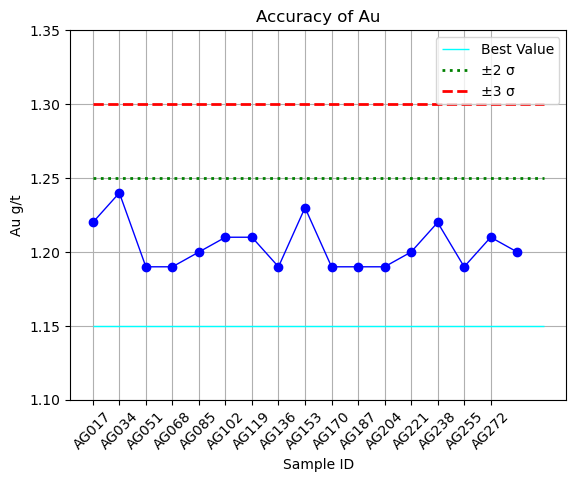

In [10]:
# Shewhart plot
fig, ax = plt.subplots()

ax.set_title("Accuracy of Au")

# Samples result lineplot 
ax.plot(y, color='blue', linewidth=1, marker='o')

# Lineplot edgecolors for warnings and errors
for i in range(1, len(y)):
    if y[i] < minus3SD or y[i] > plus3SD:
        ax.scatter(x[i-1], y[i], edgecolors='red', color='white')
    elif y[i] < minus2SD or y[i] > plus2SD:
        ax.scatter(x[i-1], y[i], edgecolors='black', color='white')
    else:
        ax.scatter(x[i-1], y[i], color='white')

# Control lines    
ax.hlines(y=av, xmin=0, xmax=len(df), linewidth=1, color='cyan', linestyles='-', label='Best Value')
ax.hlines(y=minus2SD, xmin=0, xmax=len(df), linewidth=2, color='green', linestyles=':', label='±2 σ')
ax.hlines(y=plus2SD, xmin=0, xmax=len(df), linewidth=2, color='green', linestyles=':')
ax.hlines(y=minus3SD, xmin=0, xmax=len(df), linewidth=2, color='red', linestyles='--', label='±3 σ')
ax.hlines(y=plus3SD, xmin=0, xmax=len(df), linewidth=2, color='red', linestyles='--')
plt.legend()

# Set a standard Y axis range (min: 1.1, max: 1.35)
plt.ylim([1.1, 1.35])

# Adjust Y ticks as needed
plt.yticks(np.arange(1.1, 1.36, 0.05))

# Slant the x-axis labels
plt.xticks(rotation=45)

# Grid plot
plt.grid()

# Axis titles
plt.xlabel('Sample ID')
plt.ylabel('Au g/t')

plt.show()


**Comments:**
- Add            

# Bias

In [11]:
# Average result for CRM analysis 
means = df['Au'].mean()
means.round(3)

1.204

In [12]:
# Bias
bias = (means - av) / av * 100

In [13]:
print("{} bias for {} in laboratory {} is {:.2f}".format(analyte,crm,lab,bias))

Au bias for Standard in laboratory INTK is 4.71


**Conclusion:**
- Add.